# Linear Discriminant Analysis (LDA)
LDA calculates  the directions onto which the original data set with can be projected to maximize the scatter among the clusters of different classes while minimizaing the scatter within the classes. Turns out, if there are c classes in the data set, only (c-1) such directions are required to retain the class separability (assuming the number of samples is larger than the number of features). Hence, LDA can be used to reduce the dimensionality (size) of a data set by many folds without losing information on class separation. As such, LDA is a strong unsupervised learning algorithm when a supervised data set is available for classification.<br>

LDA assumes that the given labelled data is linearly separable.

## Import Libraries

In [133]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})

## Generate a Linearly-Separable Data Set
Since LDA assumes that the data set is linearly separable in d-dimensional space where d is the number of features of each sample, we will generate a data set of our own to satisfy this constraint. Assume the number of classes present in the data set is c. Then, the good thing about LDA is that it maximizes the separability while reducing the number of features from d to c-1 where d could be very large in comparison to c. This is a huge boost in complexity when classification training is performed after LDA.

In [134]:
no_of_samples = 100

c1 = np.random.normal(loc = (1,1,1), scale = 0.1, size = (no_of_samples, 3))
c2 = np.random.normal(loc = (2,2,2), scale = 0.1, size = (no_of_samples, 3))
c3 = np.random.normal(loc = (1.5,1.5,1.5), scale = 0.1, size = (no_of_samples, 3))

# Generate labels for all the classes
c1_label = np.array([1 for idx in range(0, no_of_samples)])
c2_label = np.array([2 for idx in range(0, no_of_samples)])
c3_label = np.array([3 for idx in range(0, no_of_samples)])

print(c1.shape, c1_label.shape)

(100, 3) (100,)


Standardize the features using the parameters from the whole data set. WHY?????????????????

In [135]:
raw_features = np.concatenate((c1, c2, c3))
raw_features.shape

(300, 3)

In [136]:
scaler = StandardScaler()
features = scaler.fit_transform(raw_features)
features.shape

(300, 3)

In [137]:
# Attach class labels to all the classes
labels = np.concatenate((c1_label, c2_label, c3_label))

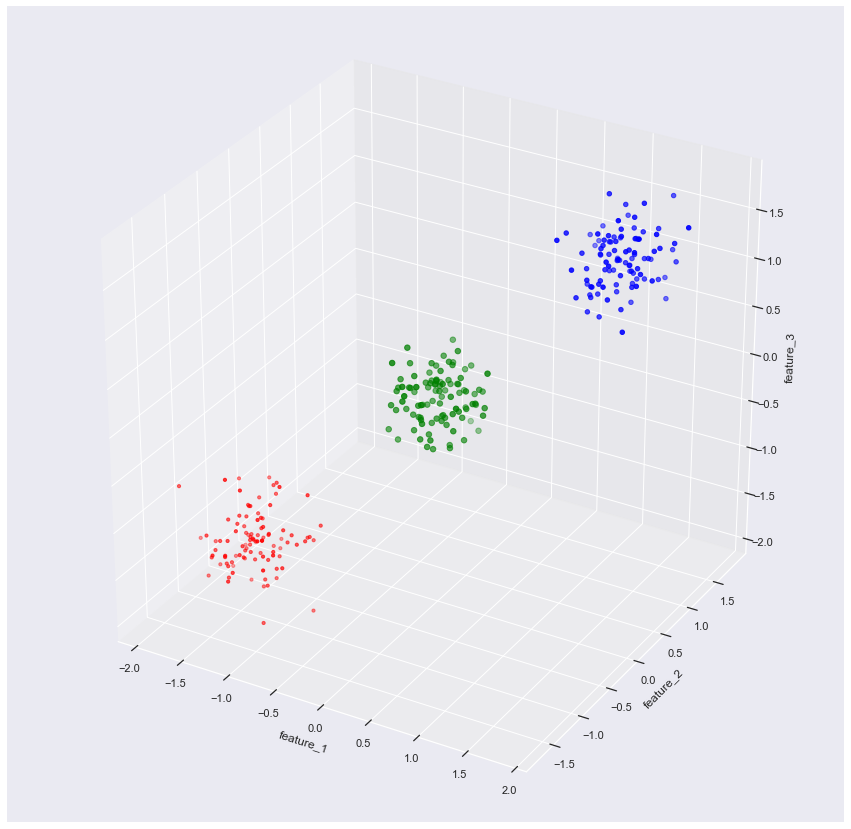

In [138]:
col_names = ["feature_1", "feature_2", "feature_3"]


# Create the figure
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

x_vals = features[:, 0:1]
y_vals = features[:, 1:2]
z_vals = features[:, 2:3]

custom_colors = {
    
    1:"red",
    2:"blue",
    3:"green"
    
}

custom_colors_list = [custom_colors[label] for label in labels]
custom_marker_size = [label*10. for label in labels]


# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = custom_colors_list, marker='o', s = custom_marker_size)
ax.set_xlabel("feature_1")
ax.set_ylabel("feature_2")
ax.set_zlabel("feature_3")

plt.savefig("scatter_hue", bbox_inches='tight')

plt.show()

If S<sub>w1</sub>, S<sub>w2</sub>, and S<sub>w3</sub> represent the total within-class scatter for the classes 1, 2, and 3 respectively and S<sub>W</sub> is the total witin-class scatter given as S<sub>W</sub> =  S<sub>w1</sub>  + S<sub>w2</sub>  + S<sub>w3</sub>, and S<sub>B</sub> represents the total between-class scatter, then LDA derivation gives that the Eigen directions of the matrix S<sub>W</sub><sup>-1</sup>S<sub>B</sub> gives the directions/ vectors such that if the data set is projected onto them, the scatter between the class is maximized while minimizing the within-class scatter.<br>



### First calculate S<sub>B</sub>.<br>
There are 3 features of each sample. i.e., d = 3
There are 3 classes. i.e., c = 3

In [139]:
# Centroid of the whole data set
only_features_of_whole_data = np.concatenate((c1,c2,c3))
centroid_total = only_features_of_whole_data.mean(axis = 0).reshape((1, -1))

# Cetroids of different classes
centroid_1 = c1.mean(axis = 0).reshape((1, -1))
centroid_2 = c2.mean(axis = 0).reshape((1, -1))
centroid_3= c3.mean(axis = 0).reshape((1, -1))
centroid_total, centroid_1, centroid_2, centroid_3

(array([[1.49992813, 1.5020342 , 1.49625322]]),
 array([[1.00491066, 0.9943579 , 0.9978357 ]]),
 array([[1.99848188, 1.9981228 , 1.99503762]]),
 array([[1.49639186, 1.51362192, 1.49588634]]))

In [140]:
N1 = len(c1) # total number of samples of class 1
SB1 = N1 * (np.dot((centroid_1 - centroid_total).T, centroid_1 - centroid_total))
SB1

array([[24.50423026, 25.13086446, 24.67253822],
       [25.13086446, 25.77352325, 25.30347647],
       [24.67253822, 25.30347647, 24.8420022 ]])

In [141]:
N2 = len(c2) # total number of samples of class 1
SB2 = N2 * (np.dot( centroid_2 - centroid_total,(centroid_2 - centroid_total).T))

In [142]:
N3 = len(c3) # total number of samples of class 1
SB3 = N3 * (np.dot( centroid_3 - centroid_total,(centroid_3 - centroid_total).T))

In [143]:
SB = SB1 + SB2 + SB3
SB

array([[ 98.86348253,  99.49011673,  99.03179049],
       [ 99.49011673, 100.13277552,  99.66272874],
       [ 99.03179049,  99.66272874,  99.20125447]])

### Then calculate S<sub>W</sub> ,  S<sub>W</sub><sup>-1</sup> and S<sub>W</sub><sup>-1</sup> S<sub>B</sub>.

#### Scatter within class 1

In [145]:
within_class_1_scatter = np.zeros((3,3)) # 3 features present

for sample in c1:
    
    sample_minus_centroid = sample.reshape(-1,1) - centroid_1[0].T
    within_class_1_scatter += np.dot(sample_minus_centroid, sample_minus_centroid.T)


within_class_1_scatter

array([[ 3.18873406, -0.05575559,  0.2552988 ],
       [-0.05575559,  2.60355914, -0.00855727],
       [ 0.2552988 , -0.00855727,  3.79361322]])

#### Scatter within class 2

In [146]:
within_class_2_scatter = np.zeros((3,3))

for sample in c2:
    sample_minus_centroid = sample.reshape(-1,1) - centroid_2[0].T
    within_class_2_scatter += np.dot(sample_minus_centroid, sample_minus_centroid.T)

within_class_2_scatter

array([[ 2.46833919, -0.01934798,  0.33650131],
       [-0.01934798,  3.59651654,  0.0380332 ],
       [ 0.33650131,  0.0380332 ,  3.09280868]])

#### Scatter within class 3

In [147]:
within_class_3_scatter = np.zeros((3,3))

for sample in c3:
    sample_minus_centroid = sample.reshape(-1,1) - centroid_3[0].T
    within_class_3_scatter += np.dot(sample_minus_centroid, sample_minus_centroid.T)

within_class_3_scatter

array([[ 1.9882769 ,  0.24768473, -0.2301349 ],
       [ 0.24768473,  3.07403987, -0.18224731],
       [-0.2301349 , -0.18224731,  2.57119577]])

#### Total scatter within classes

In [148]:
SW = within_class_1_scatter + within_class_2_scatter + within_class_3_scatter
SW

array([[ 7.64535016,  0.17258117,  0.36166521],
       [ 0.17258117,  9.27411555, -0.15277138],
       [ 0.36166521, -0.15277138,  9.45761768]])

### S<sub>W</sub><sup>-1</sup> and S<sub>W</sub><sup>-1</sup> S<sub>B</sub>.

In [149]:
SW_inv = np.linalg.pinv(SW) 
SW_inv

array([[ 0.13109448, -0.00252278, -0.00505389],
       [-0.00252278,  0.10790424,  0.00183948],
       [-0.00505389,  0.00183948,  0.10595785]])

In [150]:
SW_inv_SB = np.matmul(SW_inv, SB) # Matrix multiplication
SW_inv_SB

array([[12.20897001, 12.28630832, 12.22974234],
       [10.66816185, 10.7370872 , 10.68667454],
       [10.17656072, 10.2414288 , 10.19398367]])

### Find the eigen vectors of  S<sub>W</sub><sup>-1</sup>S<sub>B</sub>.

In [151]:
# eig() returns eigen vectors as columns. Not necessarily in order.

eig_vals, eig_vecs = np.linalg.eig(SW_inv_SB)
eig_vals

array([3.31392970e+01, 7.43841248e-04, 8.64572280e-16])

One of the eigen values is ~0. This is not a coincidence. LDA gives c-1 non-zero eigen values for a data set with c classes. Think why.

### Project the data set onto the two eigen vectors.

In [152]:
eig_vecs = eig_vecs_ascending[:,[0,2]] # selecting only the first and the third eigen vectors

projected_samples = np.dot(eig_vecs.T, features.T)
projected_samples.shape

(2, 300)

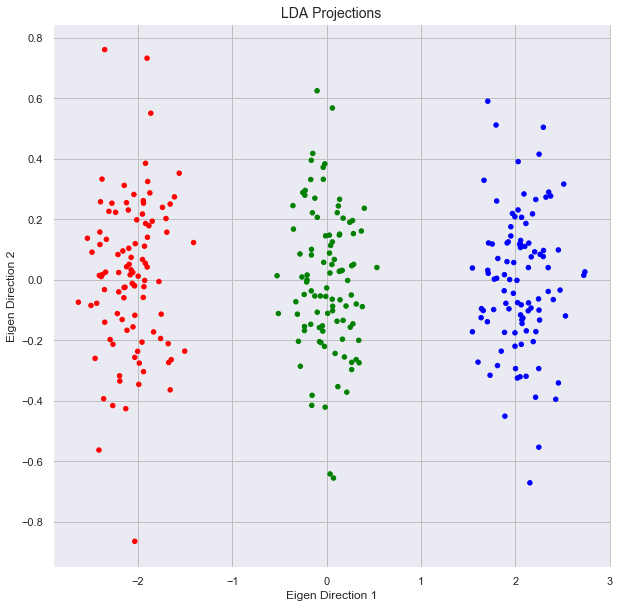

In [153]:
from matplotlib  import cm


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_title("LDA Projections", fontsize=14)
ax.set_xlabel("Eigen Direction 1",fontsize=12)
ax.set_ylabel("Eigen Direction 2",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

first_eigen_direction = projected_samples[0]
second_eigen_direction = projected_samples[1]
# z = np.random.random(30)

# scatter with colormap mapping to z value
custom_colors = {
    
    1:"red",
    2:"blue",
    3:"green"
    
}

custom_colors_list = [custom_colors[label] for label in labels]
ax.scatter(first_eigen_direction, second_eigen_direction, s=20, marker = 'o', c = custom_colors_list)

plt.show()

As seen above, the data set is linearly separable even in the 2D space after LDA projection.